In [ ]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
import matplotlib.pyplot as plt


In [ ]:
#ex2.1
# creating input vector and initial weights
x = torch.tensor([1])
z = torch.tensor([1])

In [ ]:
# setting up the network
class Net_1(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        self.fc1.weight.data.normal_(0,0)
        #self.fc1.weight.data.fill_(0)

    def forward(self, x):
        z_hat = self.fc1(x)
        return z_hat


net = Net_1()
print(net)

Net_1(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses=[]
weights=[]


In [ ]:
# training the net
steps = 80


for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    net = net.float()

    z_hat = net(x.float())
    loss = loss_f(z_hat.float(), z.float())
    losses.append(loss)
    loss.backward()
    optimizer.step()
    weights.append(deepcopy(net.fc1.weight))

In [ ]:
z_hat1 = net(x.float())
z_hat1

tensor([0.9546], grad_fn=<AddBackward0>)

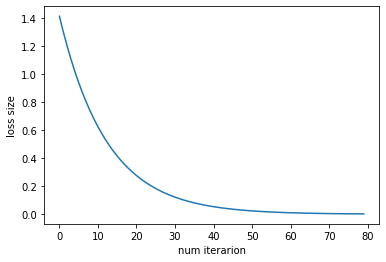

In [ ]:
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

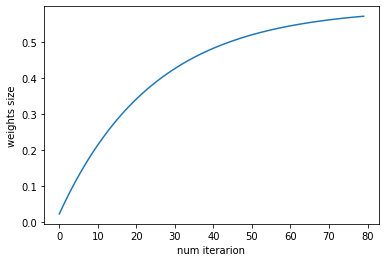

In [ ]:
plt.plot(weights)
plt.ylabel('weights size')
plt.xlabel('num iterarion')

plt.show()

# to add : compare to the theortoical



In [ ]:
#ex2.2
# creating input vector and initial weights
mu_x=0
sigma_x= 1
n0=100

x_vec = torch.randn(n0)
z = torch.tensor(1.0)



In [ ]:
# setting up the network
class Net(nn.Module):

    def __init__(self, n0):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, 1)
        self.fc1.weight.data.normal_(1, 0.01)

    def forward(self, x):
        z_hat = self.fc1(x)
        return z_hat


net = Net(n0)
print(net)

Net(
  (fc1): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses_2=[]

In [ ]:
# training the net
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    losses_2.append(loss)
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
z_hat = net(x_vec)
z_hat

tensor([1.0095], grad_fn=<AddBackward0>)

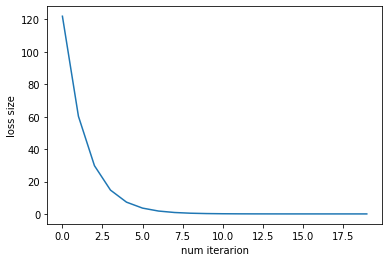

In [ ]:
plt.plot(losses_2)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

In [ ]:
#ex2.3
# creating input vector and initial weights
mu_x=0
sigma_x= 1
n0=100
n1=200

# x_vec = torch.from_numpy(np.random.normal(mu_x, sigma_x, n0))
x_vec = torch.randn(n0)
z = torch.tensor(1.)

In [ ]:
# setting up the network
class Net(nn.Module):

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 0.01)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 0.05)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat


net = Net(n0, n1)
state_dict_init = deepcopy(net.state_dict())
w1_init = net.fc1.weight.clone()
w2_init = net.fc2.weight.clone()

print(net)

Net(
  (fc1): Linear(in_features=100, out_features=200, bias=False)
  (fc2): Linear(in_features=200, out_features=1, bias=False)
)


In [ ]:
# defining loss function and optimization algorithm 
loss_f = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
losses=[]



In [ ]:
# training the net
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
z_hat = net(x_vec.float())
z_hat

tensor([1.], grad_fn=<SqueezeBackward3>)

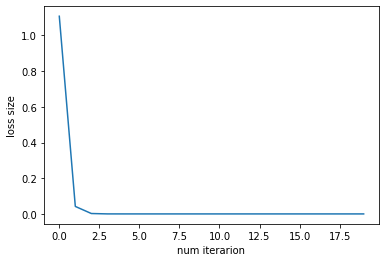

In [ ]:
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

In [ ]:
# Ex3
# w1- init w2-final
with torch.no_grad():
  w1_final=net.fc1.weight.clone()
  w2_final=net.fc2.weight.clone()

  net.fc1.weight[:] = w1_init
  z_hat_0 = net(x_vec.float())
  loss_0 = loss_f(z_hat_0.float(), z.float())
  print(f"z_hat_0: {z_hat_0[0]:.3f}, loss_0: {loss_0:.3f}")


z_hat_0: -0.016, loss_0: 1.033


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
# w1- final w2-init
with torch.no_grad():
  net.fc1.weight[:] = w1_final
  net.fc2.weight[:]=w2_init
  z_hat_0 = net(x_vec.float())
  loss_0 = loss_f(z_hat_0.float(), z.float())
  print(f"z_hat_0: {z_hat_0[0]:.3f}, loss_0: {loss_0:.3f}")

z_hat_0: 0.973, loss_0: 0.001


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


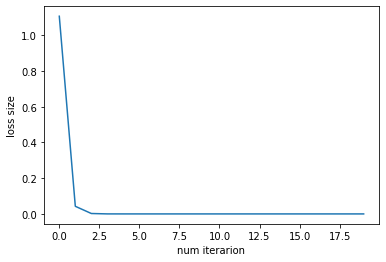

In [ ]:
# freeze w1, train w2
with torch.no_grad():
    net.fc1.weight[:] = w1_init
# training the net
losses=[]
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

z_hat = net(x_vec.float())
z_hat
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


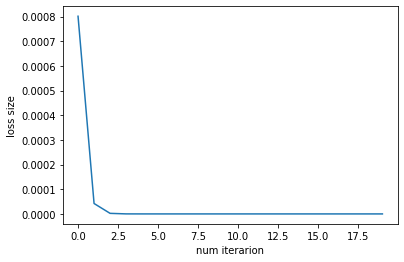

In [ ]:
# freeze w2, train w1
with torch.no_grad():
    net.fc2.weight[:] = w2_init
# training the net
losses=[]
steps = 20

for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    losses.append(loss)
    optimizer.step()

z_hat = net(x_vec.float())
z_hat
plt.plot(losses)
plt.ylabel('loss size')
plt.xlabel('num iterarion')
plt.show()

In [ ]:
# Ex 4 (Part 3)



In [ ]:
w1_init = net.fc1.weight.clone()

net.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0050, -0.0068,  0.0032,  ..., -0.0009,  0.0013,  0.0100],
                      [ 0.0139,  0.0073, -0.0123,  ...,  0.0148,  0.0036,  0.0132],
                      [ 0.0014,  0.0072,  0.0059,  ...,  0.0071, -0.0078, -0.0058],
                      ...,
                      [ 0.0104,  0.0006,  0.0202,  ...,  0.0072, -0.0026,  0.0095],
                      [ 0.0138, -0.0039, -0.0029,  ...,  0.0062,  0.0041,  0.0054],
                      [-0.0098,  0.0163, -0.0052,  ...,  0.0213, -0.0260, -0.0007]])),
             ('fc2.weight',
              tensor([[ 4.0493e-02, -1.5172e-02,  3.9456e-02,  9.1477e-02,  1.0502e-02,
                        3.2768e-03,  4.5125e-02,  1.1051e-02,  3.1800e-02, -8.4543e-03,
                        3.9618e-02,  1.0621e-01, -1.1689e-02,  4.7488e-02,  1.1326e-02,
                       -2.1602e-02,  4.0779e-02, -7.3966e-02,  7.4389e-02, -1.8460e-02,
                       -4.6115e-02, -4.6844e-02,  2.9978e-

In [ ]:
net.load_state_dict(state_dict_init)

<All keys matched successfully>

In [ ]:
a = np.arange(5)
b = a

In [ ]:
a[0] = 10

In [ ]:
a

array([10,  1,  2,  3,  4])

In [ ]:
b

array([10,  1,  2,  3,  4])